### **GROUP 2 EDA ASSIGNMENT**
#### Jinay Vora       (202201473)
#### Khushi Prajapati (202201062)
#### Shreshtha Modi   (202411015)


# **SKLEARN**
## Use the scikit-learn package to load your data, preprocess data, train your model, evaluate it, and make predictions.
## Explain the sublibraries and corresponding functions in each of them that you use in the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Getting the data and converting it from csv to Dataframe.

df = pd.read_csv(r"happines_dataset.csv")
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [3]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [4]:
# Checking how many null values are there in each column of the dataset.
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [5]:
# Checking how many unique values are there in each column of the dataset.
df.nunique()

Country name                         165
year                                  19
Life Ladder                         1814
Log GDP per capita                  1760
Social support                       484
Healthy life expectancy at birth    1126
Freedom to make life choices         550
Generosity                           650
Perceptions of corruption            613
Positive affect                      442
Negative affect                      394
dtype: int64

In [6]:
print(df.dtypes)

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object


## Here, Country name column is in object form. So, we will encode it using LabelEncoder, because an object datatype cannot be used to find correlation, and cannot be fitted in the ML model.

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # Defining Label Encoder.
df['Country name'] = le.fit_transform(df['Country name']) # Fitting the Country name column.
print(df.dtypes)
df.head()

Country name                          int64
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,0,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,0,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,0,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,0,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,0,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


## Here, we have to predict the Life Ladder column using regression models. So, we will now find correlations of other columns with respect to Life Ladder.

In [8]:
corr = df.corr()
print(corr['Life Ladder'])

Country name                       -0.004529
year                                0.046846
Life Ladder                         1.000000
Log GDP per capita                  0.783556
Social support                      0.722738
Healthy life expectancy at birth    0.714927
Freedom to make life choices        0.538210
Generosity                          0.177398
Perceptions of corruption          -0.430485
Positive affect                     0.515283
Negative affect                    -0.352412
Name: Life Ladder, dtype: float64


## Generally, the columns which have the closest value of correlation to 0 are considered to be the features used for predicting Life Ladder. But almost all the columns here have high correlation. So, we will not be dropping any of them.

## Now, we will impute all the missing values using the MissForest Imputer. We will use RandomForestRegressor as an estimator.

In [9]:
from sklearn.ensemble import RandomForestRegressor
from missforest import MissForest

rfr = RandomForestRegressor()
mf = MissForest(rfr)

df = mf.fit_transform(df)
df.head()

 80%|████████  | 4/5 [00:01<00:00,  2.86it/s]c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\missforest\missforest.py:348: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\missforest\missforest.py:538: UserWarning: Stopping criterion triggered. Before last imputation matrix will be returned.
  warnings.warn("Stopping criterion triggered. Before last "
 80%|████████  | 4/5 [00:01<00:00,  2.26it/s]


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,0,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,0,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,0,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,0,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,0,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [10]:
df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

## Now, we will check out if there are outliers in our data.

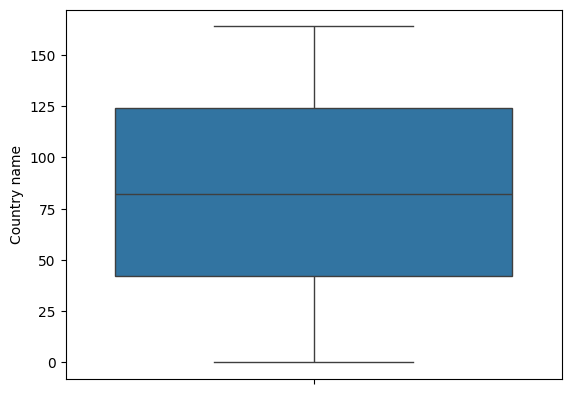

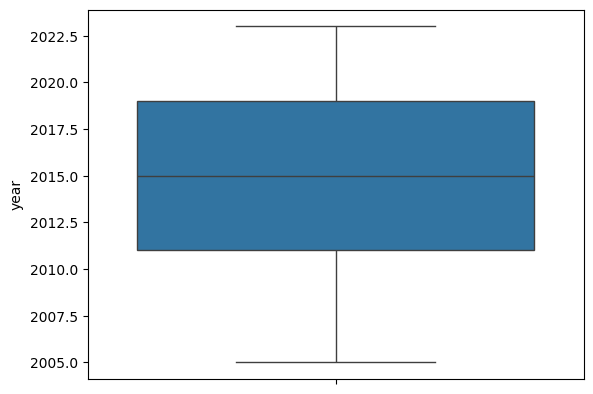

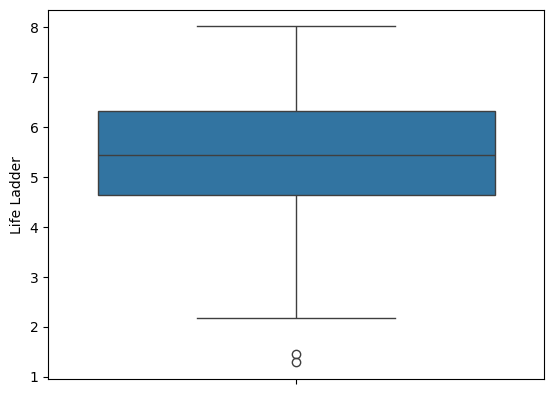

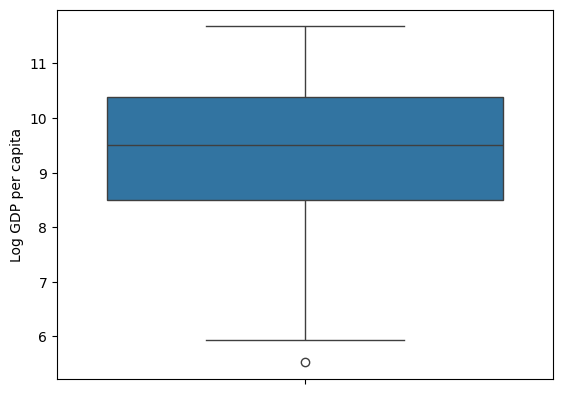

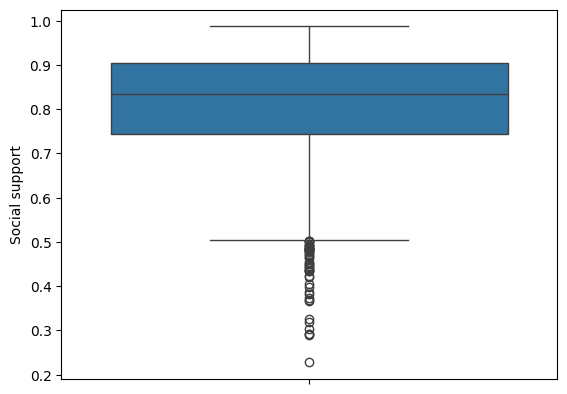

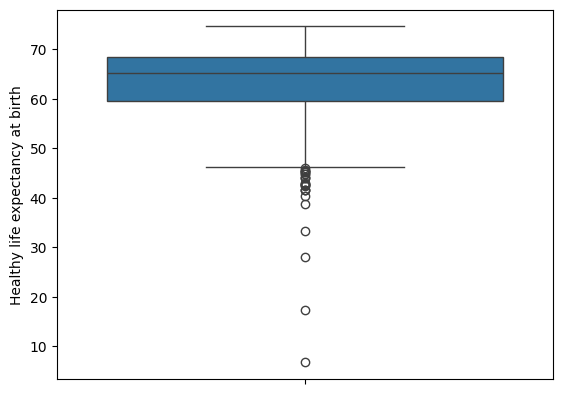

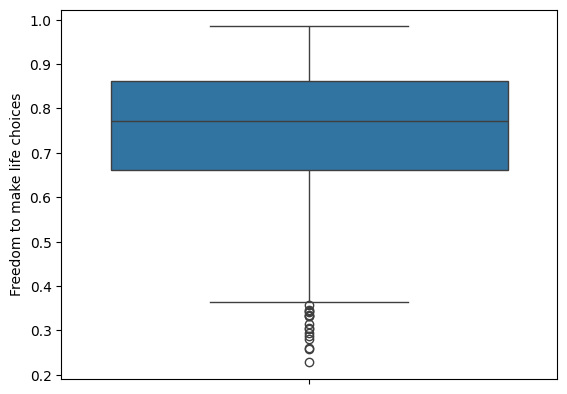

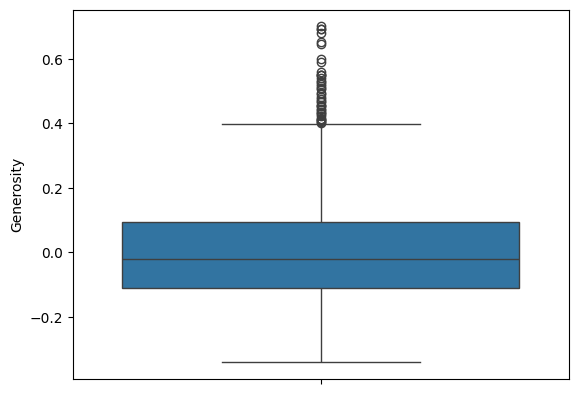

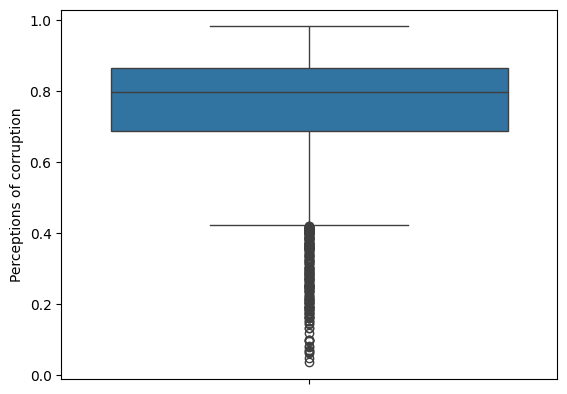

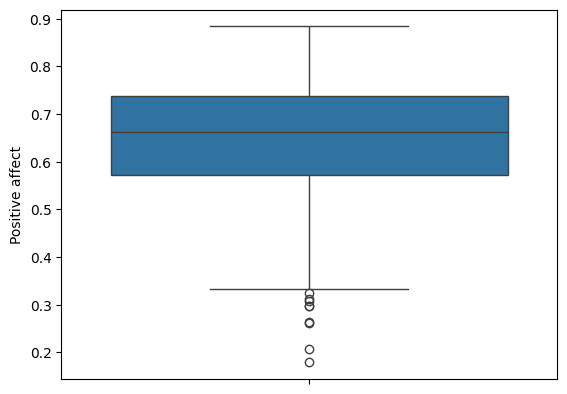

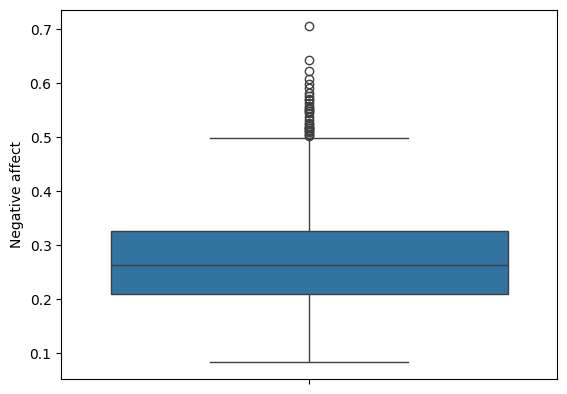

In [11]:
import seaborn as sns

for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

## We will also check the kde plots and skewness of the data.

Country name                       -0.002718
year                               -0.064369
Life Ladder                        -0.053811
Log GDP per capita                 -0.329438
Social support                     -1.113107
Healthy life expectancy at birth   -1.153183
Freedom to make life choices       -0.708872
Generosity                          0.766856
Perceptions of corruption          -1.509183
Positive affect                    -0.453949
Negative affect                     0.694359
dtype: float64


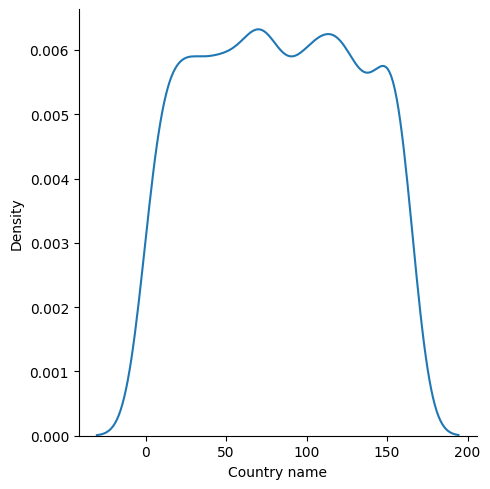

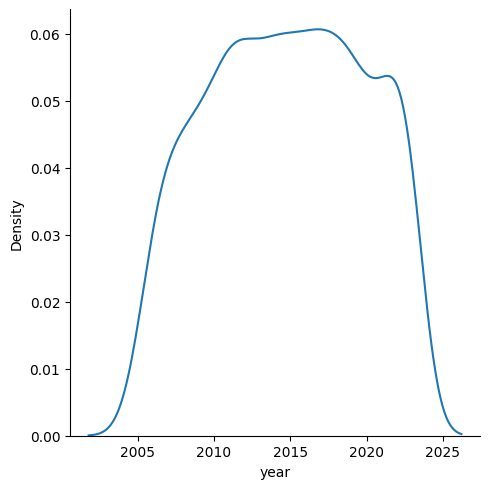

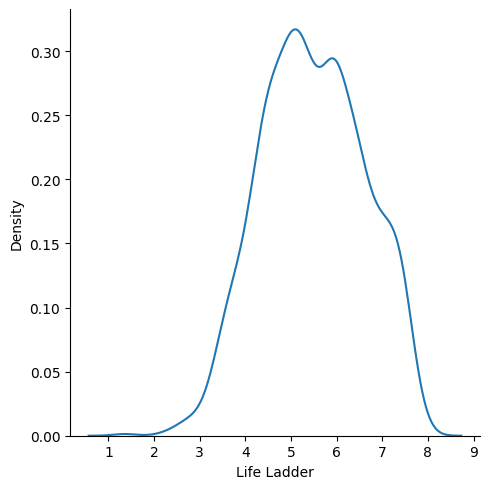

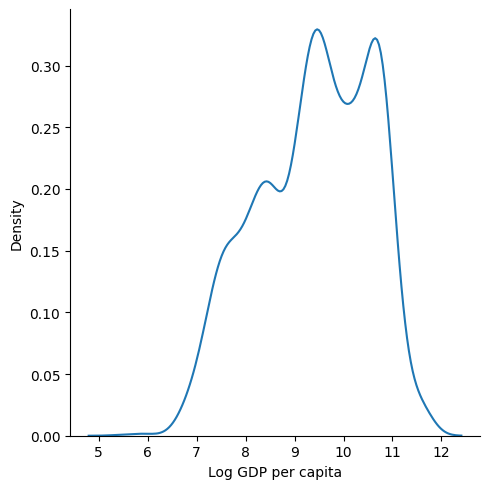

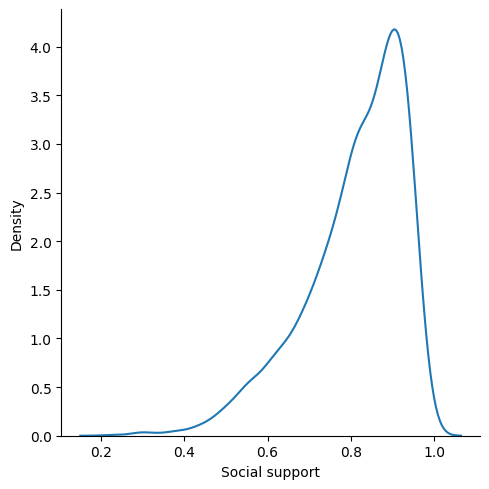

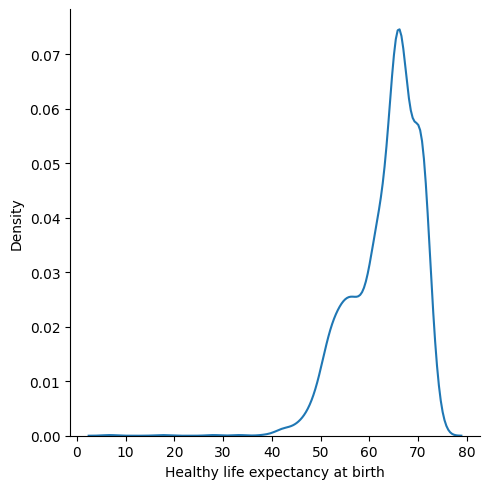

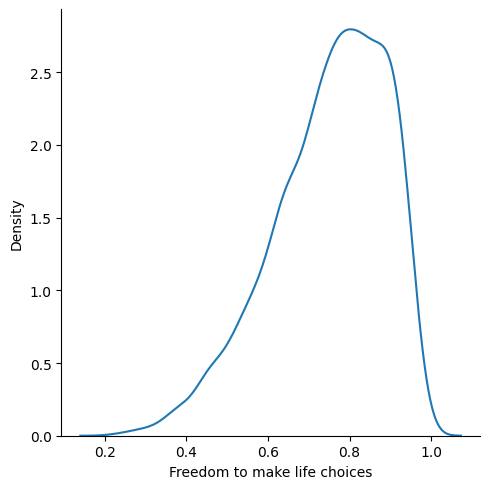

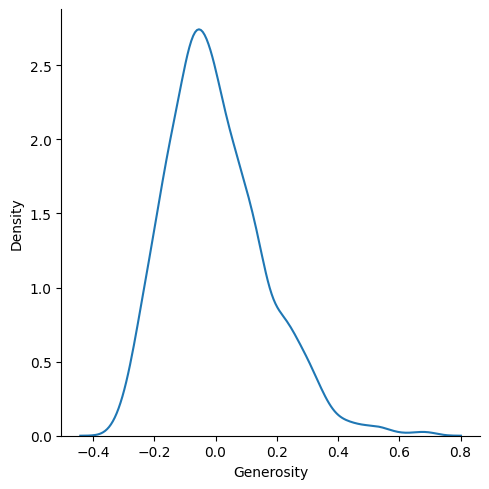

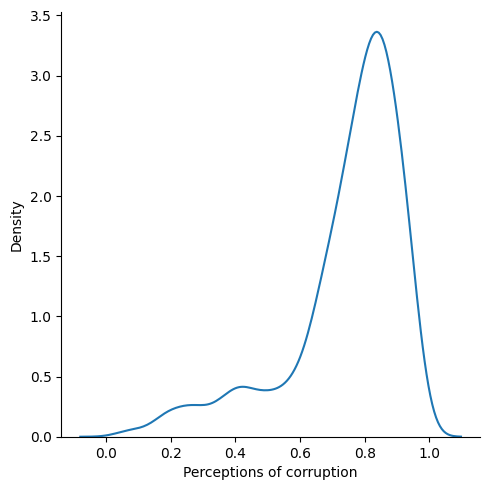

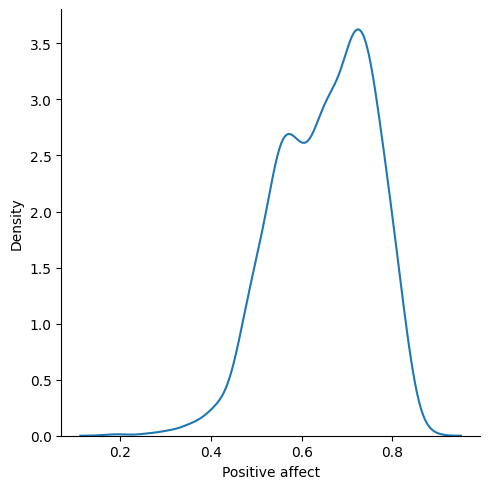

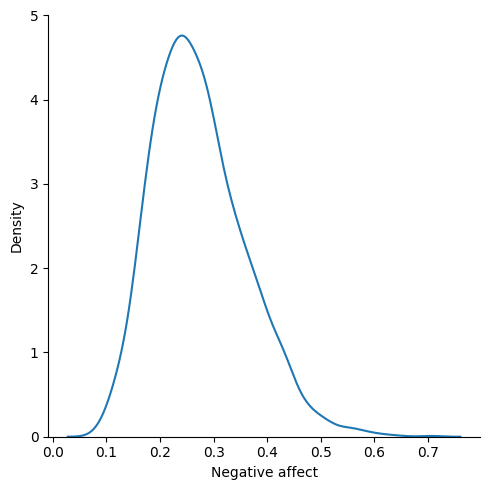

In [12]:
for i in df.columns:
    sns.displot(df[i], kind='kde')
print(df.skew())

## Here, almost every columns have outliers. So, we will use PowerTransform, which whill also improve the skewness of the data.

In [13]:
from sklearn.preprocessing import PowerTransformer

pf = PowerTransformer(method='yeo-johnson')

columns = df.drop(columns={'Country name', 'year', 'Life Ladder'}, axis=1).columns # Excluding columns that are not to be transformed.

for i in columns:
    df[i] = pf.fit_transform(df[[i]])

## Now, we will plot everything again to compare the changes.

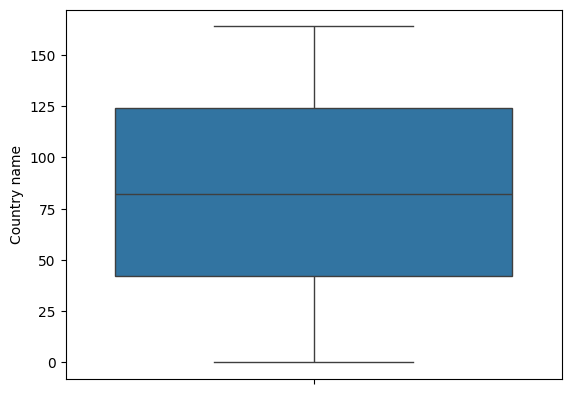

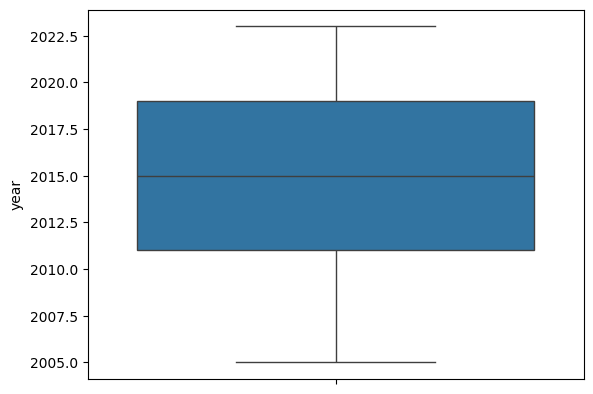

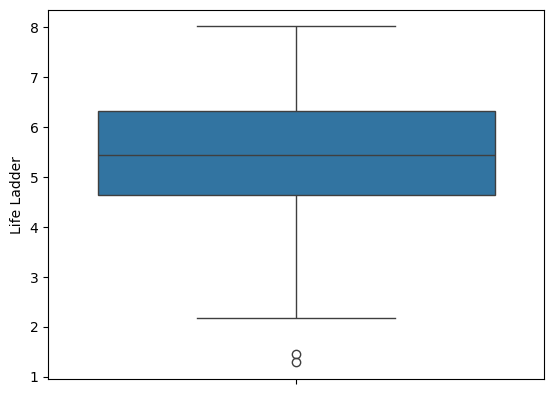

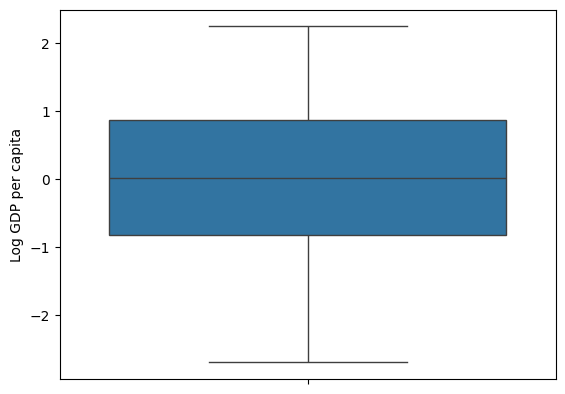

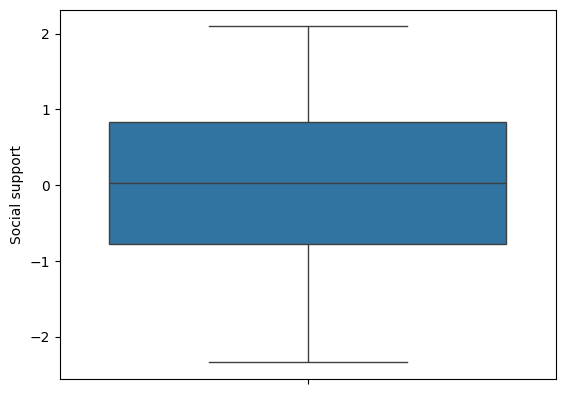

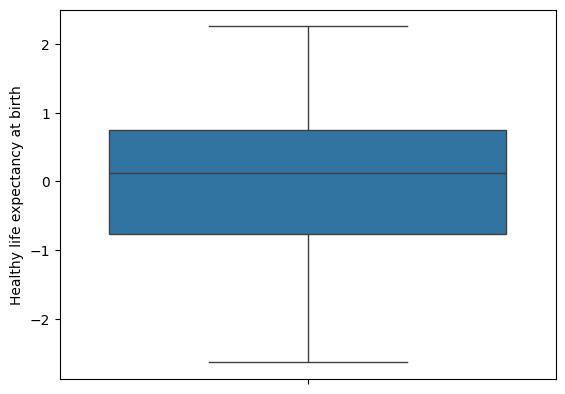

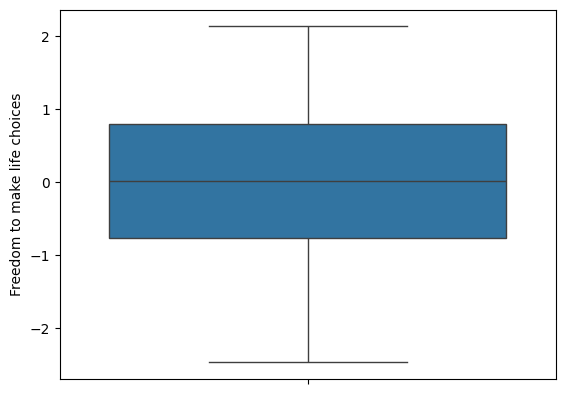

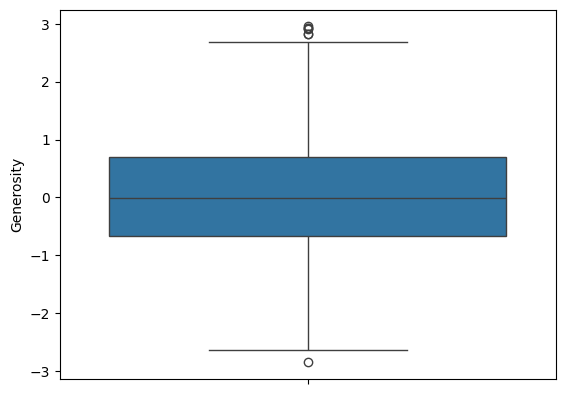

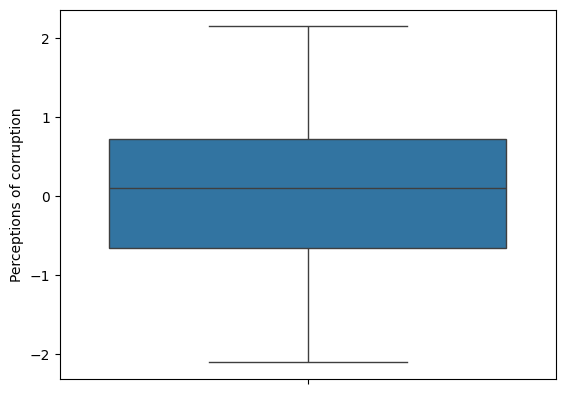

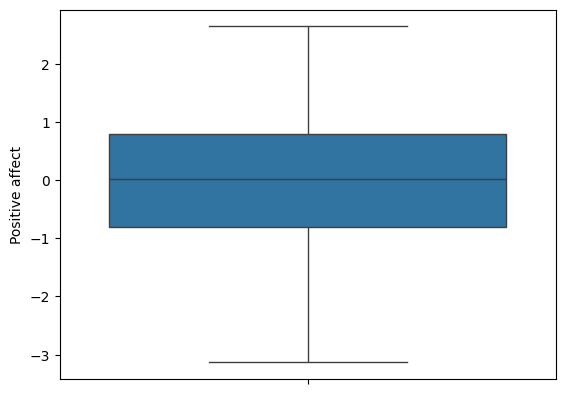

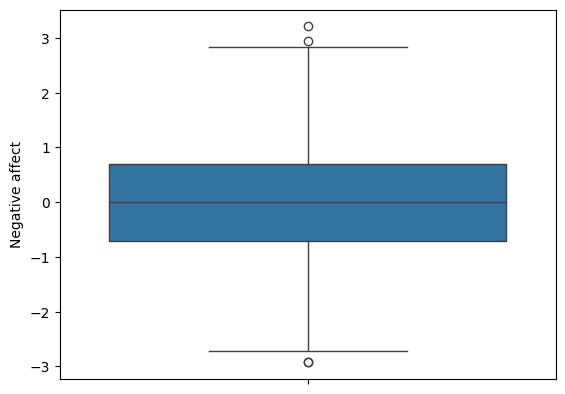

In [14]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

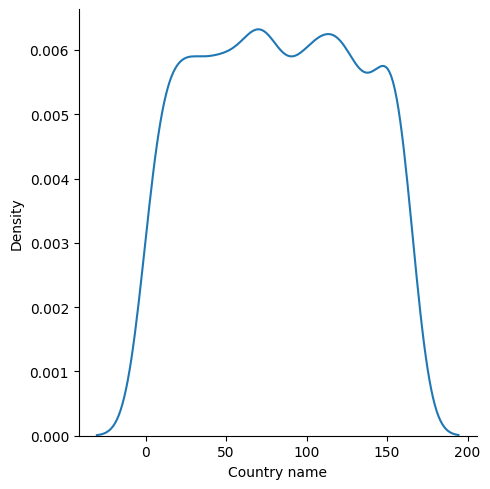

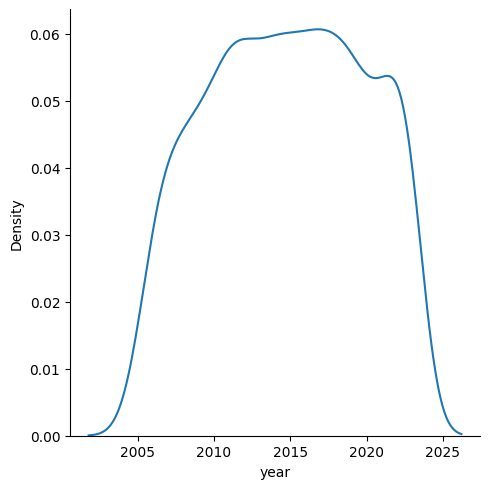

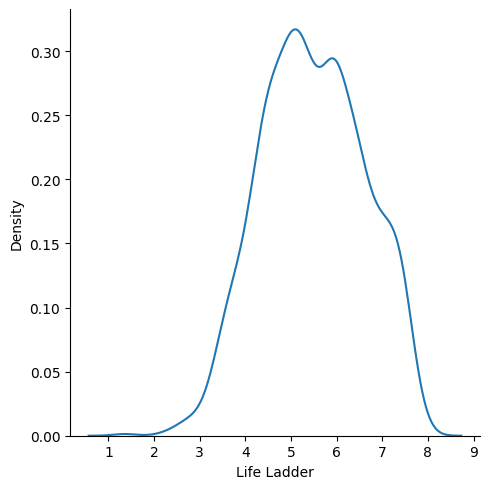

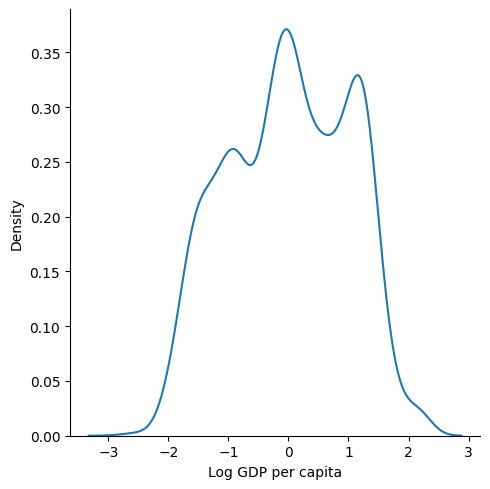

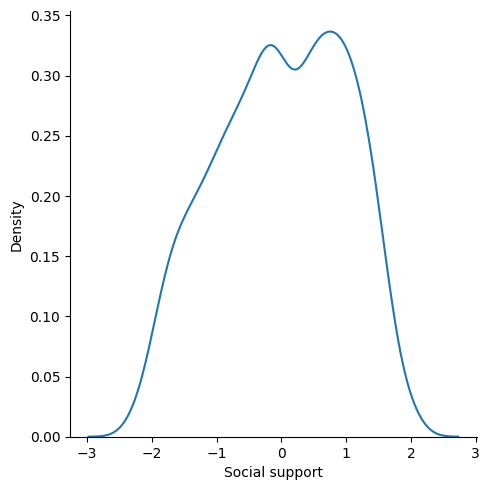

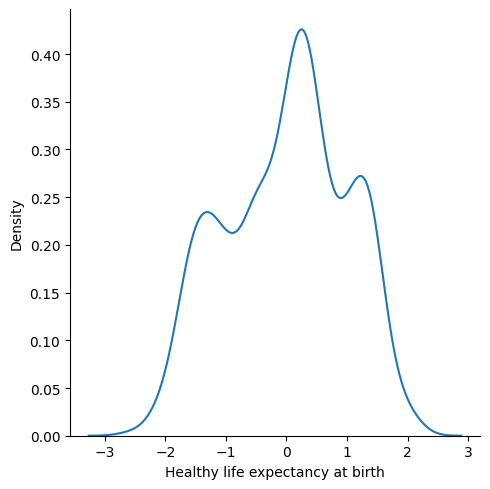

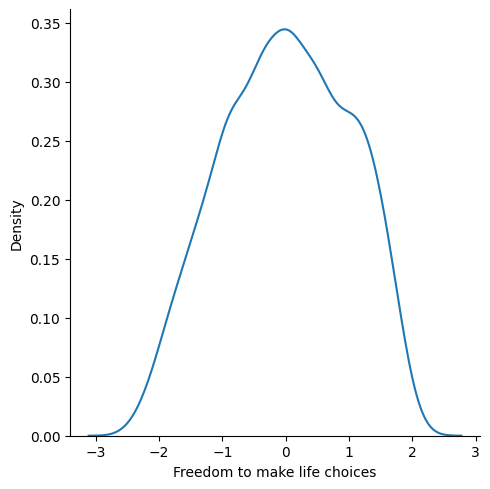

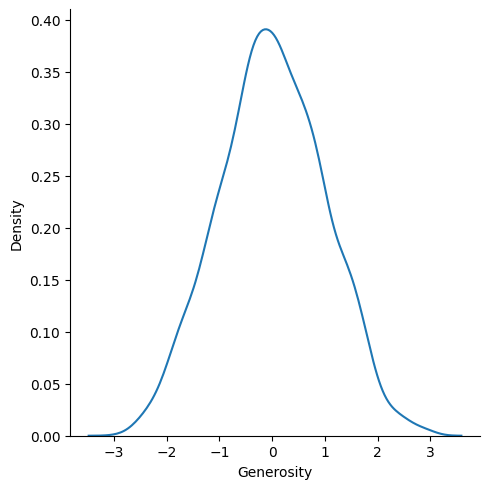

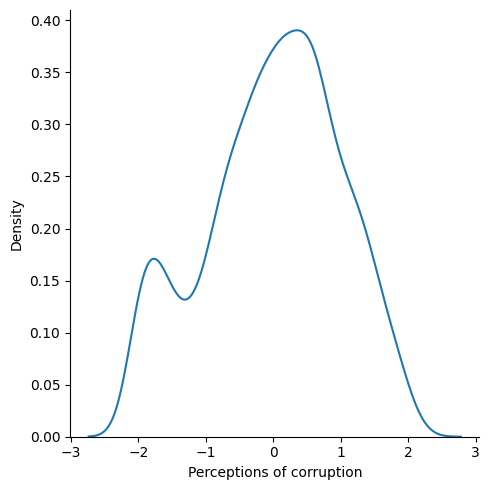

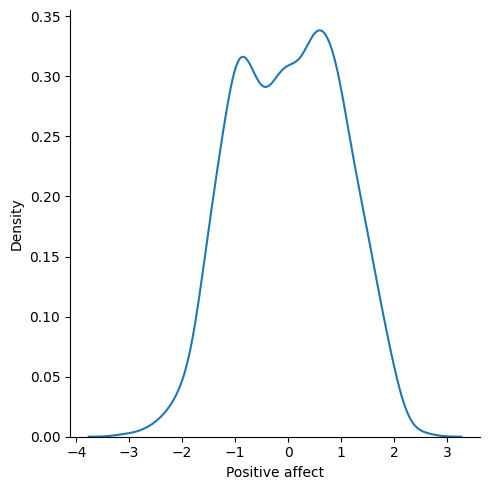

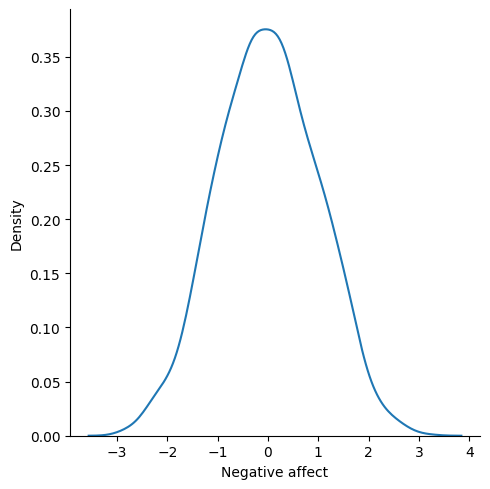

Country name                       -0.002718
year                               -0.064369
Life Ladder                        -0.053811
Log GDP per capita                 -0.085773
Social support                     -0.184130
Healthy life expectancy at birth   -0.167354
Freedom to make life choices       -0.109857
Generosity                          0.022927
Perceptions of corruption          -0.265429
Positive affect                    -0.059002
Negative affect                     0.017909
dtype: float64

In [15]:
for i in df.columns:
    sns.displot(df[i], kind='kde')
    plt.show()
df.skew()

## Now, the data is finally ready to be fitted into an ML model.

In [16]:
from sklearn.model_selection import train_test_split

Features = df.drop(columns=['Life Ladder'],axis=1)
Labels = df['Life Ladder']

Features_train, Features_test, Labels_train, Labels_test = train_test_split(Features, Labels, test_size=0.2, shuffle=True, random_state=42)

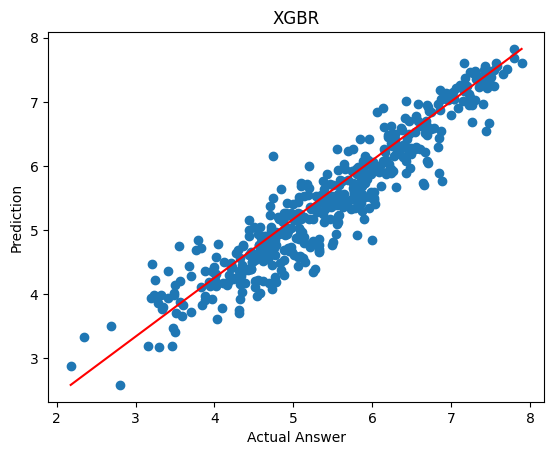

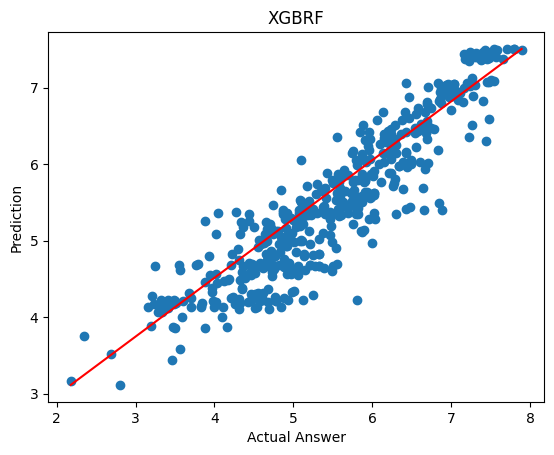

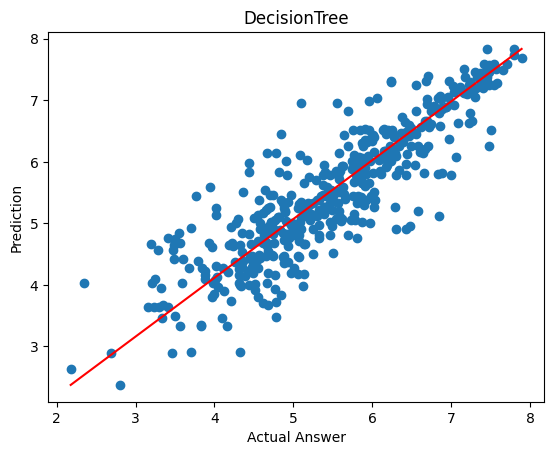

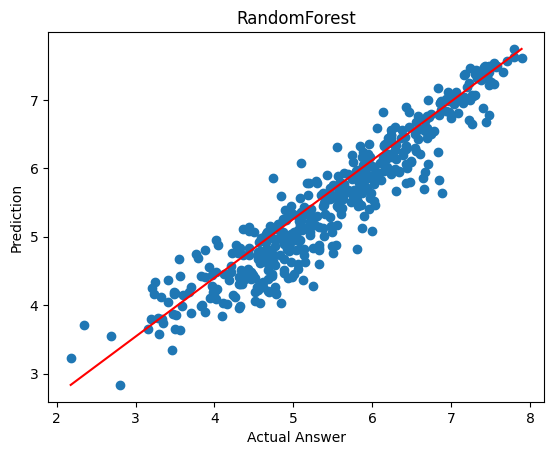

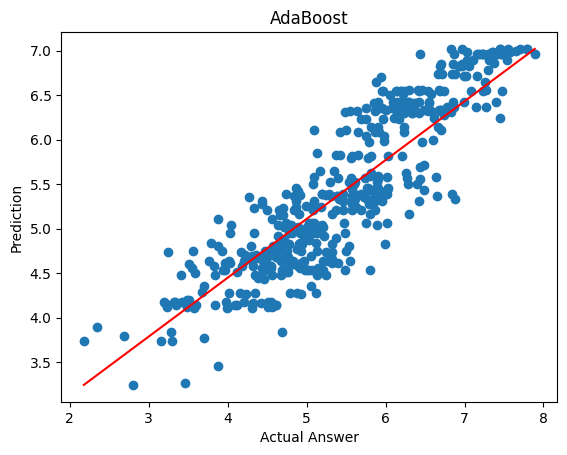

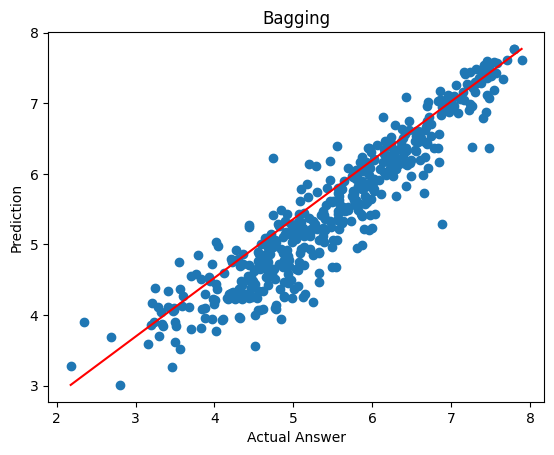

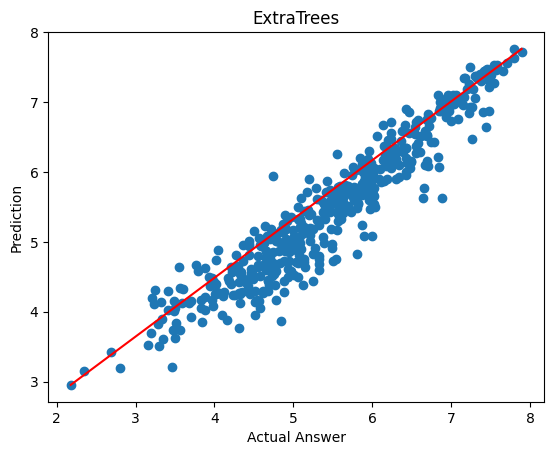

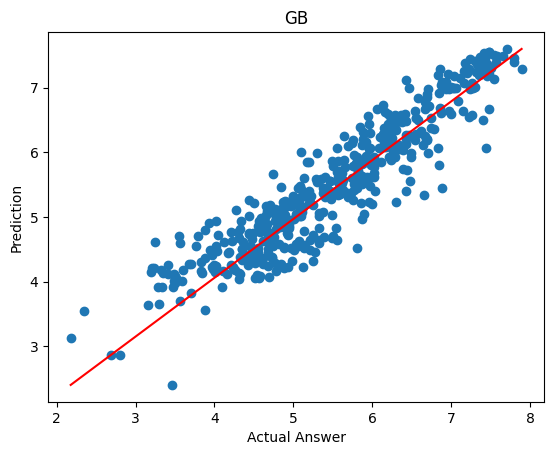

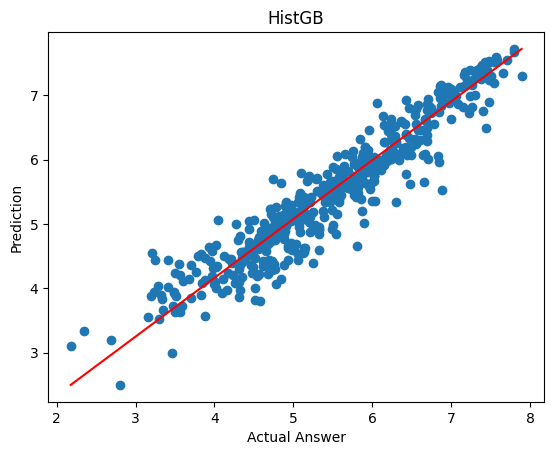

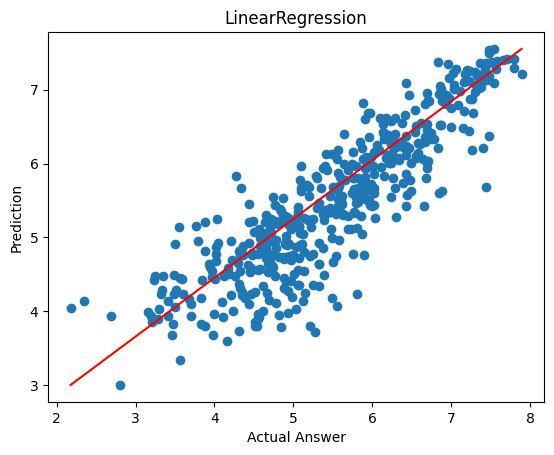

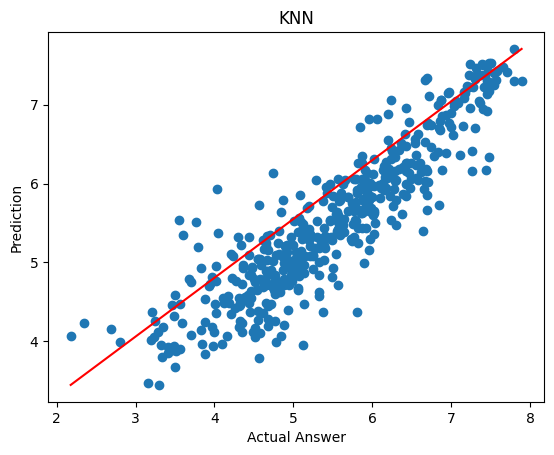

In [17]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

Model_dict = {'XGBR': XGBRegressor(), 'XGBRF': XGBRFRegressor(), 'DecisionTree': DecisionTreeRegressor(), 'RandomForest': RandomForestRegressor(), 'AdaBoost': AdaBoostRegressor(), 'Bagging': BaggingRegressor(), 'ExtraTrees': ExtraTreesRegressor(), 'GB': GradientBoostingRegressor(), 'HistGB': HistGradientBoostingRegressor(), 'LinearRegression': LinearRegression(), 'KNN': KNeighborsRegressor()}
MAE_dict = {}
MSE_dict = {}
RMSE_dict = {}
R2_Score_dict = {}
Accuracy_Score_dict = {}
Cross_Val_dict = {}

Predictions_df = pd.DataFrame()
Predictions_df['Actual Answer'] = Labels_test

for key, val in Model_dict.items():
    val.fit(Features_train, Labels_train)
    
    Pred = val.predict(Features_test)
    Predictions_df[key] = Pred
    
    mae = mean_absolute_error(Pred,Labels_test)
    mse = mean_squared_error(Pred,Labels_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(Pred,Labels_test)
    accuracy = val.score(Features_test, Labels_test)
    crossval = cross_val_score(val, Features, Labels, cv=KFold(n_splits=10, shuffle=True, random_state=42))
    
    MAE_dict.update({key:mae})
    MSE_dict.update({key:mse})
    RMSE_dict.update({key:rmse})
    R2_Score_dict.update({key:r2})
    Accuracy_Score_dict.update({key:accuracy})
    Cross_Val_dict.update({key:crossval})
    
    plt.scatter(Labels_test, Pred)
    plt.title(key)
    plt.xlabel('Actual Answer')
    plt.ylabel('Prediction')
    plt.plot([min(Labels_test),max(Labels_test)],[min(Pred),max(Pred)],color='red')
    plt.show()
    

In [18]:
Scores_df = pd.DataFrame()

Scores_df['Model Name'] = Model_dict.keys()
Scores_df['MAE'] = MAE_dict.values()
Scores_df['MSE'] = MSE_dict.values()
Scores_df['RMSE'] = RMSE_dict.values()
Scores_df['R2'] = R2_Score_dict.values()
Scores_df['Accuracy'] = Accuracy_Score_dict.values()
Scores_df['Cross Val'] = Cross_Val_dict.values()
Scores_df

,Model Name,MAE,MSE,RMSE,R2,Accuracy,Cross Val
0,XGBR,0.281561,0.139814,0.373916,0.872202,0.888736,"[0.8901938513333374, 0.8837352811161026, 0.904..."
1,XGBRF,0.342382,0.203498,0.451108,0.788167,0.838056,"[0.8478809702465597, 0.8248456950626188, 0.855..."
2,DecisionTree,0.397349,0.301685,0.549258,0.744511,0.759919,"[0.8035636541572432, 0.7419849426091891, 0.777..."
3,RandomForest,0.277060,0.140371,0.374661,0.862455,0.888293,"[0.8961025215942738, 0.8827745002053119, 0.893..."
4,AdaBoost,0.401275,0.254485,0.504465,0.694729,0.797481,"[0.7995557193122935, 0.7753051135722945, 0.791..."
5,Bagging,0.293381,0.159368,0.399209,0.849602,0.873175,"[0.8884434075359545, 0.8695957112980758, 0.878..."
6,ExtraTrees,0.260985,0.123444,0.351346,0.880901,0.901763,"[0.9065948962778866, 0.9063505941257993, 0.916..."
7,GB,0.328625,0.183335,0.428177,0.819690,0.854102,"[0.8601837112992914, 0.8469316321129137, 0.855..."
8,HistGB,0.271096,0.129667,0.360093,0.878118,0.896811,"[0.8938716989066008, 0.8907953273140263, 0.901..."
9,LinearRegression,0.413708,0.291063,0.539503,0.696457,0.768372,"[0.7847841958172541, 0.7493113865512914, 0.783..."
